In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
from os import path
import weblogo

In [3]:
import seqlogo

In [4]:
np.random.seed(42)

In [5]:
random_ppm = np.random.dirichlet(np.ones(4), size=6)

In [6]:
pfm = pd.DataFrame(np.random.randint(0, 36, size=(8, 4)))
pwm = seqlogo.Ppm(seqlogo.pfm2ppm(pfm))

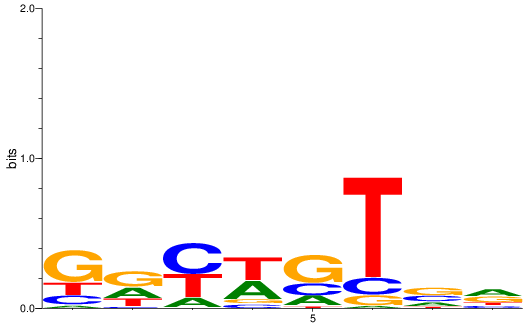

In [7]:
seqlogo.seqlogo(pwm, ic_scale = True, format = 'png', size = 'medium',filename='test.png')

In [8]:
pwm

,A,C,G,T
0,0.055556,0.166667,0.555556,0.222222
1,0.298246,0.052632,0.421053,0.228070
2,0.150943,0.471698,0.018868,0.358491
3,0.364865,0.081081,0.094595,0.459459
4,0.194030,0.238806,0.522388,0.044776
5,0.027027,0.135135,0.081081,0.756757
6,0.202381,0.297619,0.392857,0.107143
7,0.380435,0.141304,0.326087,0.152174


In [9]:
os.path.isfile('fpUTR_ACAGTG-s_7_1.txt')

False

## Filename to dataset mapping

load previous saved file index table

In [10]:
!pwd

/Users/Yue/Documents/HGLab_new/RBC/SeqLogo


In [11]:
fileIdxTable = pd.read_csv('../RBC_fid_table.csv')
fileIdxTable.head(2)

,Barcodes,Sets,Types,Timepoint,Position,FileName
0,ATCACG,8,S24,0,ATCACG,ATCACG-s_5_1
1,TTAGGC,8,S24,1,TTAGGC,TTAGGC-s_5_1


In [12]:
## exact same barcode and timepoint, slightly change the name
fileIdxTable.iloc[17,5] = 'ACTTGA-s_7_1_f6'

## experiment ways to create pfm from data

In [13]:
pfm = pd.DataFrame(np.random.randint(0, 36, size=(30, 4)))

In [14]:
arr = np.zeros((30,4))
pd.DataFrame(arr)
a=seqlogo.Pfm(pfm)

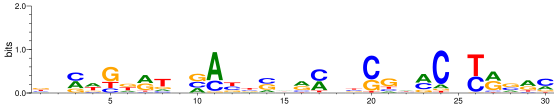

In [17]:
ppmt = seqlogo.pfm2ppm(seqlogo.Pfm(pfm))
seqlogo.seqlogo(seqlogo.Ppm(ppmt), ic_scale = True, format = 'svg', size = 'large',filename='test.png')

In [12]:
barcode = 'ATCACG-s_5_1'
r = fileIdxTable.loc[fileIdxTable['FileName']==barcode]
datset = ''+r['Types'][0] + '_' + str(r['Timepoint'][0]) + '_' + str(r['Sets'][0])
datset

'S24_0_8'

In [13]:
seqfName = 'fpUTR_'+barcode+'.txt'

In [36]:
def file2count(fname):
    raw_count = np.zeros((30,4))
    with open(fname) as f:
        lines = f.read().splitlines()
    lines_tr=[''.join(s) for s in zip(*lines)]
    print('#lines = ',len(lines))
    for i in range(30):
        raw_count[i][0] = lines_tr[i].count('A')
        raw_count[i][1] = lines_tr[i].count('C')
        raw_count[i][2] = lines_tr[i].count('G')
        raw_count[i][3] = lines_tr[i].count('T')
    return raw_count

In [37]:
def plotlogo(datset,raw_count):
    pfm_pd=pd.DataFrame(raw_count)
    ppm_pd=seqlogo.pfm2ppm(pfm_pd)
    ppm = seqlogo.Ppm(ppm_pd)
    seqlogo.seqlogo(ppm, ic_scale = True, format = 'png', size = 'xlarge',filename=datset+'.png')
    seqlogo.seqlogo(ppm, ic_scale = True, format = 'svg', size = 'medium',filename=datset+'.svg')

In [38]:
for index, row in fileIdxTable.iterrows():
    barcode = row['FileName']
    fpFile = 'fpUTR_'+barcode+'.txt'
    #print(fpFile)
    datset = ''+row['Types'] + '_' + str(row['Timepoint']) + '_' + str(row['Sets'])
    raw_count = file2count(fpFile)
    plotlogo('fpUTR/'+datset,raw_count)
    orfFile = 'orf_left5percent_'+barcode+'.txt'
    datset = ''+row['Types'] + '_' + str(row['Timepoint']) + '_' + str(row['Sets'])
    raw_count = file2count(orfFile)
    plotlogo('ORF/'+datset,raw_count)    

#lines =  343708
#lines =  395437
#lines =  306243
#lines =  353589
#lines =  342620
#lines =  378190
#lines =  343170
#lines =  341832
#lines =  336674
#lines =  334185
#lines =  298979
#lines =  354572
#lines =  159364
#lines =  174031
#lines =  119414
#lines =  134217
#lines =  122265
#lines =  134960
#lines =  202666
#lines =  202102
#lines =  197646
#lines =  198247
#lines =  182186
#lines =  211473
#lines =  610216
#lines =  618821
#lines =  658206
#lines =  718064
#lines =  444882
#lines =  528891
#lines =  260556
#lines =  250103
#lines =  299060
#lines =  271399
#lines =  145034
#lines =  155300
#lines =  778
#lines =  339
#lines =  941
#lines =  538
#lines =  1773
#lines =  587
#lines =  1228
#lines =  567
#lines =  3024
#lines =  1516
#lines =  1184
#lines =  496
#lines =  321016
#lines =  349165
#lines =  177534
#lines =  195482
#lines =  207408
#lines =  212819
#lines =  583663
#lines =  559911
#lines =  776799
#lines =  756015
#lines =  556504
#lines =  667016


In [42]:
b=['abcd','1234','abcd','xyzz']
a=[''.join(s) for s in zip(*b)]
a

['a1ax', 'b2by', 'c3cz', 'd4dz']